# Lucas-Kanade Tracking

- Create a command-line tool (interactive notebook instead) that accepts the ROI of the target (the portion of the image should be tracked in the video) and the path to the dataset and performs tracking of the target over the image sequence from the dataset. 

- Visualize the current image and highligh the targets location by a rectangle.

- Find conditions where tracking is lost and explain why.

## Problems

- Implement template-matching in Python using SSD, NCC, SAD
- Code Lucas-Kanade algorithm in Python using OpenCV
- Implement pyramidal extension to Lucas-Kanade algorithm
- Test on the 3 datasets 

*Datasets:* http://cvlab.hanyang.ac.kr/tracker_benchmark/datasets.html

In [4]:
import cv2
import numpy as np
import os 
import matplotlib.pyplot as plt

In [11]:
%matplotlib inline

In [15]:
work_dir = os.getcwd()
data_dir = os.path.join(work_dir, 'data')
lucas_kanade_data_dir = os.path.join(data_dir, 'lucas_kanade')

# Test images only to compare perfomance of handwritten methods to OpenCV 
messi_full_img = os.path.join(lucas_kanade_data_dir, 'messi_full.jpg')
messi_face_img = os.path.join(lucas_kanade_data_dir, 'messi_face.jpg')

## Problem 1. Implement template-matching using SSD, NCC, SAD

In [28]:
def template_match_ssd(image, patch):
    """
    Performs template matching usind Sum of Squared Differences
    
    Input:
    image - numpy (w, h) matrix of grayscaled image
    patch - numpy (k_w, k_h) matrix of grayscaled image patch
    
    Output:
    tuple of (p1, p0) of most prominent points of the matched patch
    """
    
    # Get the dimensions of the image and the patch
    h, w = image.shape
    k_h, k_w = patch.shape
    
    # Create matrix to store SSD between patch and sub-matrices of the image
    ssd_scores = np.zeros((h - k_h, w - k_w))
    
    # Iterate over the image and calculate SSD
    
    for i in range(0, h - k_h):
        for j in range(0, w - k_w):
            score = (image[i:i + k_h, j:j + k_w] - patch)**2
            ssd_scores[i, j] = score.sum()
            
    # Find the minimum points
    min_points = np.unravel_index(ssd_scores.argmin(), ssd_scores.shape)
    
    return (min_points[1], min_points[0])   

In [45]:
def template_match_ncc(image, patch):
    """
    Performs template matching usind Normalized Cross Correlation
    
    Input:
    image - numpy (w, h) matrix of grayscaled image
    patch - numpy (k_w, k_h) matrix of grayscaled image patch
    
    Output:
    tuple of (p1, p0) of most prominent points of the matched patch
    """
    
    # Get the dimensions of the image and the patch
    h, w = image.shape
    k_h, k_w = patch.shape
    
    # Create matrix to store SSD between patch and sub-matrices of the image
    ssd_scores = np.zeros((h - k_h, w - k_w))
    
    # Convert matrices to arrays
    image = np.array(image, dtype="float")
    patch = np.array(patch, dtype="float")
    
    for i in range(0, h - k_h):
        for j in range(0, w - k_w):
            # Get submatrix from source image
            image_sub = image[i:i + k_h, j:j + k_w]
            # Cross-correlation computation
            numerator = np.sum(image_sub * patch)
            denominator = np.sqrt( (np.sum(image_sub ** 2))) * np.sqrt(np.sum(patch ** 2))
            
            if(denominator == 0):
                # To prevent ZeroDivisionError
                ssd_scores[i, j] = 0
            else:
                ssd_scores[i, j] = numerator / denominator
                
    # Find the minimum points
    min_points = np.unravel_index(ssd_scores.argmax(), ssd_scores.shape)
    
    return (min_points[1], min_points[0])   

In [38]:
def perform_template_matching(image_path, patch_path, method = 'ssd'):
    """
    Performs template matching using one of the methods and 
    draws a rectangle on the most promising part of image
    
    Input:
    image_path - string, absolute path to image frame
    patch_path - string, absolute path to patch
    method - string, one of the methods: ssd, ncc, sad.
    
    Output:
    file with drawed rectangle
    """

    # Colored image would be used for visualization
    full_image = cv2.imread(image_path)
    full_image = cv2.cvtColor(full_image,cv2.COLOR_BGR2RGB)
    full_image_gray = cv2.cvtColor(full_image, cv2.COLOR_BGR2GRAY)
    
    patch_image = cv2.imread(patch_path, 0)
    
    # Dimensions of the image would be used for drawing a rectangle
    h, w = patch_image.shape
    
    # Perform matching
    if(method == 'ssd'):
        points = template_match_ssd(full_image_gray, patch_image)
    elif(method == 'ncc'):
        points = template_match_ncc(full_image_gray, patch_image)
    elif(method == 'sad'):
        points = template_match_ncc(full_image_gray, patch_image)
    else:
        raise ValueError("Unknown template matching method. Supported methods: ssd, ncc, sad")
    
    
    # Draw a rectangle
    cv2.rectangle(full_image, (points[0], points[1] ), (points[0] + w, points[1] + h), (0, 0, 200), 3)
    plt.imshow(full_image)

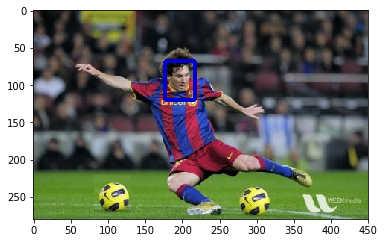

In [39]:
perform_template_matching(messi_full_img, messi_face_img)

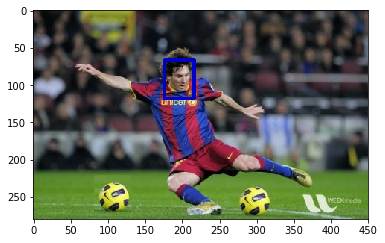

In [46]:
perform_template_matching(messi_full_img, messi_face_img, method = 'ncc')